In [56]:
import os
import cv2
import numpy as np

import torch
from torch.utils.data import DataLoader

from layers import disp_to_depth
from utils import readlines
from options import MonodepthOptions
import datasets
import networks
import PIL.Image as pil
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [57]:
gt_path = os.path.join("./splits/eigen/gt_depths.npz")
gt_depths = np.load(gt_path, fix_imports=True, encoding='latin1', allow_pickle=True)["data"]
gt_depths.shape

(697,)

In [75]:

gt_depth = gt_depths[12]
gt_depth.shape
gt_height, gt_width = gt_depth.shape[:2]
print(gt_height, gt_width)
print(np.max(gt_depth))


375 1242
78.683


[[0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 ...
 [6.439 0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    5.594 0.   ]]


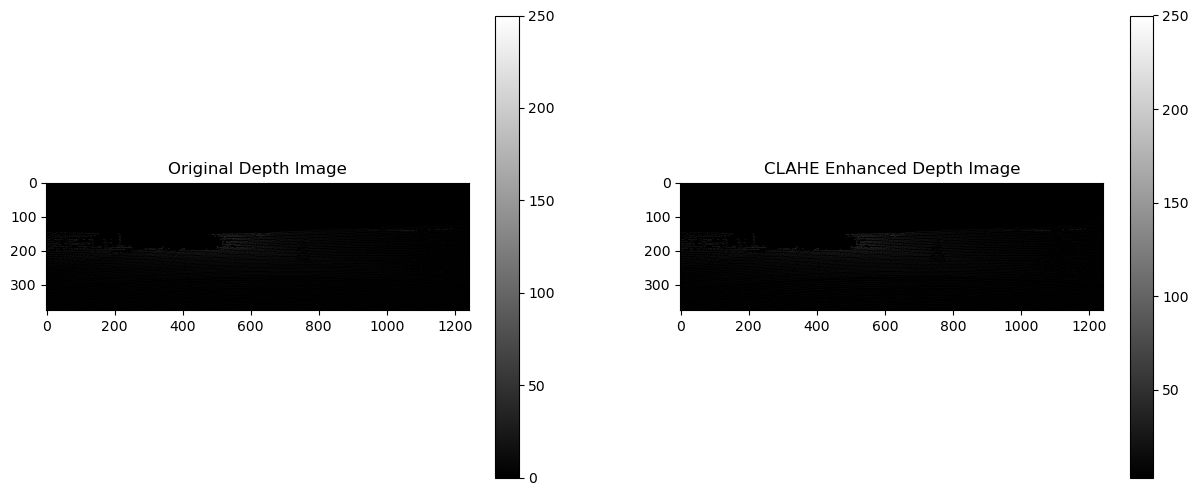

In [81]:
normalized_depth = gt_depth / 80

print)
# Scale to 0-255 for display
depth_image = (normalized_depth * 255).astype(np.uint8)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
depth_image_clahe = clahe.apply(depth_image)

# Display the depth images
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(depth_image, cmap='gray')
plt.colorbar()
plt.title('Original Depth Image')

plt.subplot(1, 2, 2)
plt.imshow(depth_image_clahe, cmap='gray')
plt.colorbar()
plt.title('CLAHE Enhanced Depth Image')

plt.show()
